## Activation Functions Intro

We use **activation functions** because, if the activation function itself is nonlinear, it allows for neural networks map nonlinear functions. 

<br>

In general, your neural network will have two types of activation functions. 
- The first type will be the activation function used in hidden layers (usually will be the same for all of them). 
- The second type will be used in the output layer.

## The Sigmoid Activation Function



Returns a value in the range of: 
- 0 for negative infinity
- through 0.5 for the input of 0
- to 1 for positive infinity


![](https://drive.google.com/uc?id=17laVogv5ny9jS_QO8aXDlsI5FBOwGuMt)

<br>

This function, historically used in hidden layers, was eventually replaced by the **Rectified Linear Units** activation function (**ReLU**). 

That said, later on (not in this notebook) we will show an example where we use the Sigmoid function as the final output layer’s activation function.

## The Rectified Linear Activation Function

This simple yet powerful activation function is the most widely used activation function at the time of writing for various reasons — mainly speed and efficiency. 

The ReLU activation function is extremely close to being a linear activation
function while remaining nonlinear, due to that bend after 0. This simple property is, however, very effective.

![](https://drive.google.com/uc?id=1bv57587yWhRhln8z9otLWNOPQ3d-YNy9)

## RELU with Single Neuron

### Code

In [31]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
def relu(val):
    return max(0, val)

In [25]:
def neuron(input, weight, bias):

    output = []
    for i in input:
        neuron_output = (i * weight) + bias

        output.append({          
            'input': i,
            'output': relu(neuron_output),
            'desc': f'max(0, ({i:.2f} * {weight}) + {bias})'
        })
    
    return output


In [99]:
def plot_neuron(
    input,
    weight,
    bias,    
    xlim, 
    ylim,
    inputs_to_highlight,
    annotation_y_offsets
):
    output = neuron(
        input=input,
        weight=weight,
        bias=bias
    )

    plt.figure(figsize=(8, 8), dpi=80)    

    plt.plot(
        input,
        [o['output'] for o in output]    
    )

    # -- ------------------------------
    colors = ['red', 'green', 'blue']    
    for idx, example_input in enumerate(inputs_to_highlight[:len(colors)]):
        example_output = neuron(
            input=[example_input],
            weight=weight,
            bias=bias
        )[0]
        
        plt.annotate(
            f'{example_output["desc"]} = {example_output["output"]:.1f}', 
            xy=(example_input, example_output['output']), 
            xytext=(example_input, example_output['output']-annotation_y_offsets[idx]), 
            arrowprops=dict(facecolor=colors[idx])            
        )


    plt.grid(axis = 'both')
    plt.title(f"Single Neuron\nf(x) = max(0, x * weight + bias)")
    plt.xlabel('Input to Single Neuron')
    plt.ylabel('Output')
    
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.show()

### weight = 0 and bias = 0

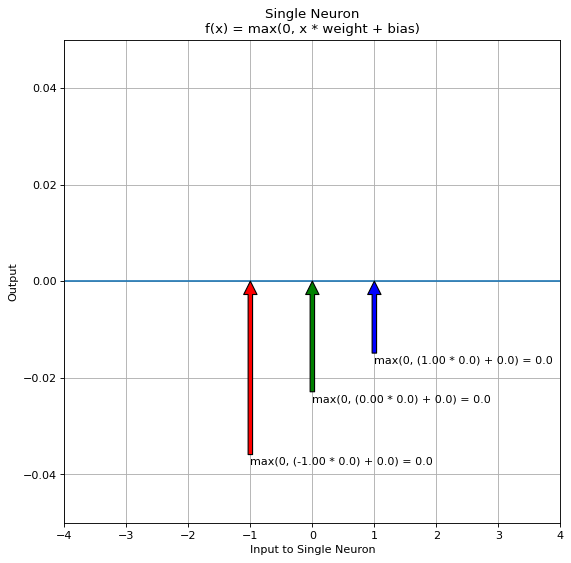

In [100]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=0.0,
    bias=0.0,    
    xlim=(-4, 4),
    ylim=(-.05, .05),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[.038, .025, .017]
)

### weight = 1 and bias = 0

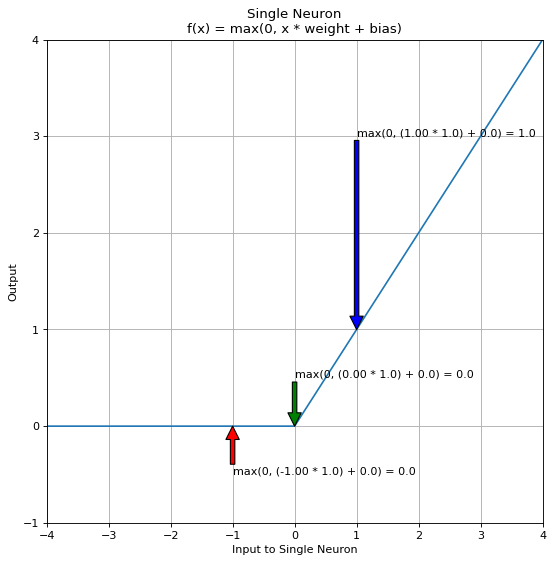

In [101]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=1.0,
    bias=0.0,    
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[.5, -.5, -2]
)

### weight = 1 and bias = 0.5

We can see that in this case, with a **single** neuron, the bias offsets the overall function’s activation point **horizontally**.

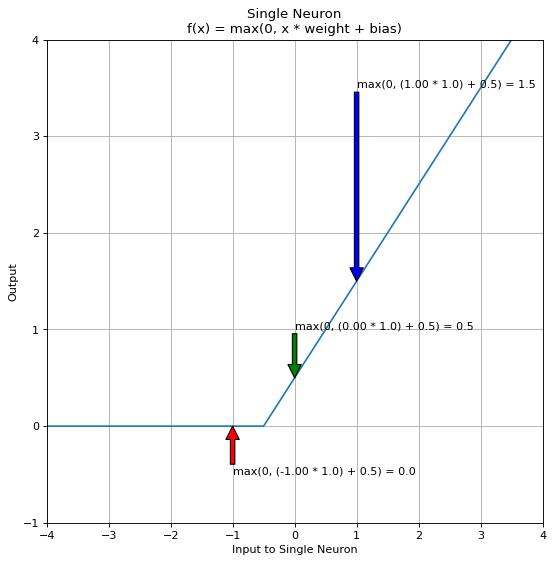

In [102]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=1.0,
    bias=0.5,    
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[.5, -.5, -2]
)

### weight = -1 and bias = 0.5

With a **negative weight** and this single neuron, the function has become a question of when this neuron **deactivates**. 

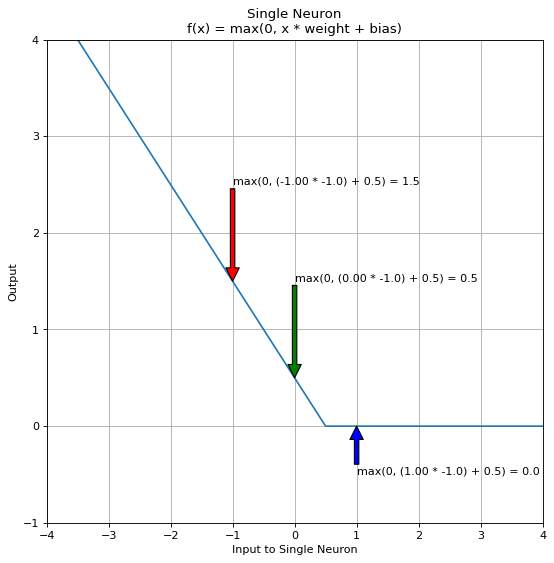

In [103]:
plot_neuron(
    input=np.arange(-5.0, 5.0, 0.1),
    weight=-1.0,
    bias=0.5,    
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[-1, -1, .5]
)

## RELU with Two Successive Neurons




### Code

In [111]:
def plot_two_neurons(
    input,
    neuron_1_weight,
    neuron_1_bias,
    neuron_2_weight,
    neuron_2_bias,    
    xlim, 
    ylim,
    inputs_to_highlight,
    annotation_y_offsets
):
    output_neuron_1 = neuron(
        input=input,
        weight=neuron_1_weight,
        bias=neuron_1_bias
    )

    output_neuron_2 = neuron(
        input=[o['output'] for o in output_neuron_1] ,
        weight=neuron_2_weight,
        bias=neuron_2_bias
    )

    # -- ------------------------------
    plt.figure(figsize=(8, 8), dpi=80)    

    plt.plot(
        input,
        [o['output'] for o in output_neuron_2]    
    )

    # -- ------------------------------
    colors = ['red', 'green', 'blue']    
    for idx, example_input in enumerate(inputs_to_highlight[:len(colors)]):

        example_output_neuron_1 = neuron(
            input=[example_input],
            weight=neuron_1_weight,
            bias=neuron_1_bias
        )[0]
        n1_output = example_output_neuron_1['output']
        n1_desc = example_output_neuron_1['desc']        

        example_output_neuron_2 = neuron(
            input=[n1_output] ,
            weight=neuron_2_weight,
            bias=neuron_2_bias
        )[0]
        n2_output = example_output_neuron_2['output']
        n2_desc = example_output_neuron_2['desc']             
        
        plt.annotate(
            f'{n1_desc} = {n1_output:.1f} --> {n2_desc} = {n2_output:.1f}', 
            xy=(example_input, n2_output), 
            xytext=(example_input, n2_output - annotation_y_offsets[idx]), 
            arrowprops=dict(facecolor=colors[idx])            
        )


    plt.grid(axis = 'both')
    plt.title(f"Two Successive Neurons\nEach neuron = f(x) = max(0, x * weight + bias)")
    plt.xlabel('Input to Two Successive Neurons')
    plt.ylabel('Ouput')
    
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.show()

### Example 1

```
neuron_1_weight = -1.0
neuron_1_bias   =  0.5
neuron_2_weight =  1.0
neuron_2_bias   =  1.0   
```

The bias of the second neuron indeed shifted the overall function, but, rather than shifting it horizontally, it shifted the function **vertically**.

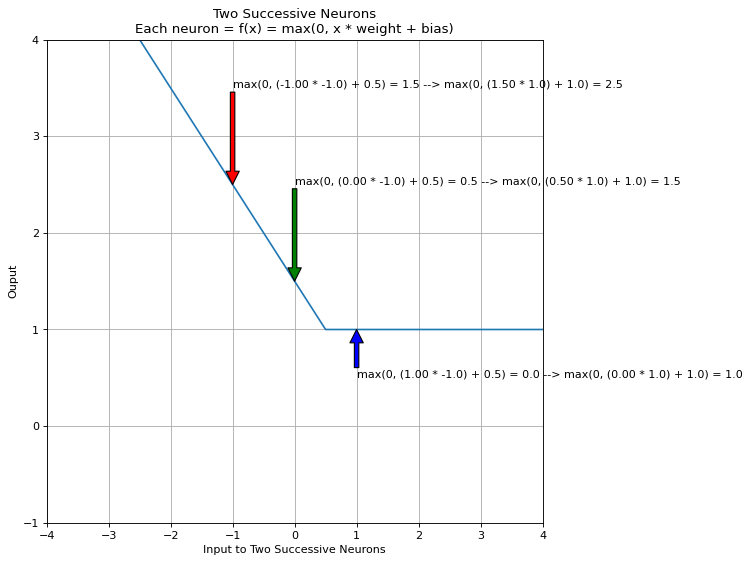

In [112]:
plot_two_neurons(
    input=np.arange(-5.0, 5.0, 0.1),
    neuron_1_weight=-1.0,
    neuron_1_bias=0.5,
    neuron_2_weight=1.0,
    neuron_2_bias=1.0,   
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, 0, 1],
    annotation_y_offsets=[-1, -1, .5]
)

### Example 2

```
neuron_1_weight = -1.0
neuron_1_bias   =  0.5
neuron_2_weight = -2.0
neuron_2_bias   =  1.0   
```

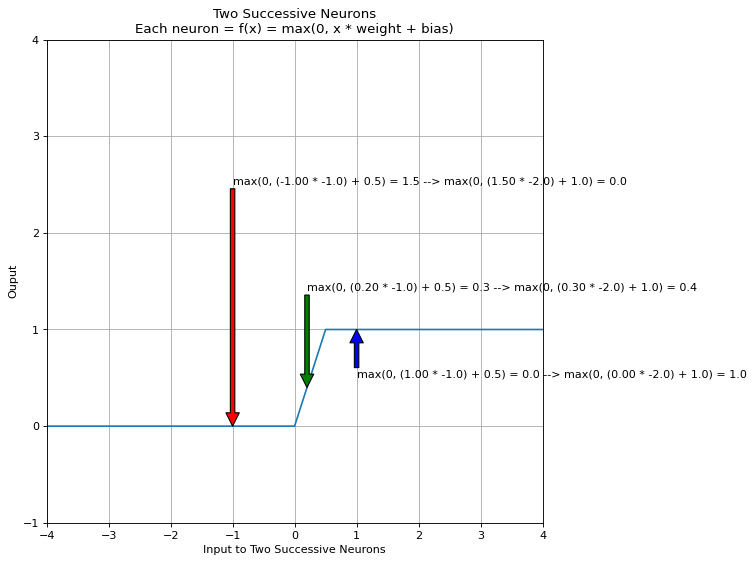

In [113]:
plot_two_neurons(
    input=np.arange(-5.0, 5.0, 0.1),
    neuron_1_weight=-1.0,
    neuron_1_bias=0.5,
    neuron_2_weight=-2.0,
    neuron_2_bias=1.0,   
    xlim=(-4, 4),
    ylim=(-1, 4),
    inputs_to_highlight=[-1, .2, 1],
    annotation_y_offsets=[-2.5, -1, .5]
)

Something exciting has occurred! 

In this example, we have both an **activation** and a **deactivation** point. 

We see their "area of effect" comes into play.


---

[Animation 1](https://www.youtube.com/watch?v=joA6fEAbAQc)

[Animation 2](https://www.youtube.com/watch?v=V_O17HPzu3Q)

## The Softmax Activation Function

In our case, we’re looking to get this model to be a **classifier**, so we want an activation function meant for classification. 

The softmax activation function can take in non-normalized, or uncalibrated, inputs and produce a normalized distribution of probabilities for our classes. 

This distribution returned by the softmax activation function represents **confidence scores** for each class and will add up to 1. 

<br>

![](https://drive.google.com/uc?id=1OngR478lvQM7OWBvvKOo_5lX_J8TKf8U)

<br>

The numerator exponentiates the current output value and the denominator takes a sum of all of the exponentiated outputs for a given sample.

---

Exponentiation serves multiple purposes. 

An exponential value of any number is always nonnegative; returns: 
- 0 for negative infinity 
- 1 for the input of 0 
- increases for positive values

![](https://drive.google.com/uc?id=1HroSgcamG-yFwdbvLTa30Ku9xdG8onx8)

---

The exponential function is a **monotonic function**: with higher input values,
outputs are also higher, so we won’t change the predicted class after applying it while making sure that we get non-negative values. 

It also adds stability to the result as the **normalized exponentiation** is more about the difference between numbers than their magnitudes.

## Interlude - `np.sum`

**Important Note** 

> With arrays, do not think of rows, columns, etc. because it might confuse you so that you think that the one dimension is more "higher-up" than another dimension - like the rows contain columns/fields. 
>
> That is **wrong** - all dimensions are equal. So if you have a 3*3*3 array, think of it as a Rubik's cube, where each dimension is just as "important" - none "contain" the other. 
>
> Same obivously applies when there is more than 3 dimensions as well ...

In [ ]:
cube = np.ones((3, 3, 3))

cube

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
cube[0]

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
cube[0][0]

array([1., 1., 1.])

In [ ]:
cube[0][0][0]

1.0

In [ ]:
cube[0][0][0] = 5.0
cube[1][0][0] = 55.0
cube[2][0][0] = 99.0

cube

array([[[ 5.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[55.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[99.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]])

In [ ]:
cube.shape

(3, 3, 3)

**Sum without axis**

In [ ]:
np.sum(cube)

183.0

...or:

In [ ]:
np.sum(cube, axis=None)

183.0

**Sum with axis 0**

Collapse dimension 0 into remaining dimensions.

In [ ]:
np.sum(cube, axis=0)

array([[159.,   3.,   3.],
       [  3.,   3.,   3.],
       [  3.,   3.,   3.]])

**Sum with axis 1**

Collapse dimension 1 into remaining dimensions.

In [ ]:
np.sum(cube, axis=1)

array([[  7.,   3.,   3.],
       [ 57.,   3.,   3.],
       [101.,   3.,   3.]])

**Perfect - but now let's keep the same dimension as the input (same number of dimensions, not that each dimension will have same size)**


In [ ]:
new_array = np.sum(cube, axis=1, keepdims=True)

new_array

array([[[  7.,   3.,   3.]],

       [[ 57.,   3.,   3.]],

       [[101.,   3.,   3.]]])

In [ ]:
new_array.shape

(3, 1, 3)

In [ ]:
cube.shape

(3, 3, 3)

In [ ]:
print(
    len(new_array.shape),
    len(cube.shape)
)

3 3


## Exploding Values

Finally, we'll also include a subtraction of the largest of the inputs before exponentiation (see full code at end).

```py
# Get unnormalized probabilities
exp_values = np.exp(
    inputs - np.max(inputs, axis=1, keepdims=True)
)
```


There are two main pervasive challenges with neural networks: “dead neurons”
and very large numbers (referred to as “exploding” values). 

“Dead” neurons and enormous numbers can wreak havoc down the line and render a network useless over time. 

The exponential function used in softmax activation is one of the sources of exploding values. 

---

We know the exponential function tends toward 0 as its input value approaches negative infinity, and the output is 1 when the input is 0. 

We can use this property to prevent the exponential function from overflowing. 

Suppose we subtract the maximum value from a list of input values. We would then change the output values to always be in a range from some negative value up to 0, as the largest number subtracted by itself returns 0, and any smaller number subtracted by it will result in a negative number - exactly the range discussed above. 

<br>

**With Softmax, thanks to the normalization, we can subtract any
value from all of the inputs, and it will not change the output.**


In [ ]:
print(f'''
    exp(-np.inf): {np.exp(-np.inf)}
    exp(-3)     : {np.exp(-3)}
    exp(-2)     : {np.exp(-2)}
    exp(-1)     : {np.exp(-1)}
    exp(-.5)    : {np.exp(-.5)}
    exp(0)      : {np.exp(0)}
'''    
)


    exp(-np.inf): 0.0
    exp(-3)     : 0.049787068367863944
    exp(-2)     : 0.1353352832366127
    exp(-1)     : 0.36787944117144233
    exp(-.5)    : 0.6065306597126334
    exp(0)      : 1.0



## Final Code

### 1: Get packages

In [ ]:
!pip install nnfs

In [ ]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()


### 2: Create the model architecture lego blocks

In [ ]:
class Layer_Dense:

    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


class Activation_ReLU:
    
    def forward(self, inputs):        
        self.output = np.maximum(0, inputs)


class Activation_Softmax:
    
    def forward(self, inputs):

        # Max val per input sample
        max_vals = np.max(
            inputs, 
            axis=1,
            keepdims=True
        )
        
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - max_vals)
        
        # Normalize them for each sample
        denominator = np.sum(
            exp_values, 
            axis=1,
            keepdims=True
        )        
        probabilities = exp_values / denominator

        self.output = probabilities

### 3: Create hidden layer of model architecture

In [ ]:
# Create Dense layer with 2 input features and 3 output values
dense1 = Layer_Dense(2, 3)

# Create ReLU activation (to be used with Dense layer):
activation1 = Activation_ReLU()

### 4: Create output layer of model architecture

In [ ]:
# Create second Dense layer with 3 input features (as we take output
# of previous layer here) and 3 output values
dense2 = Layer_Dense(3, 3)

# Create Softmax activation (to be used with Dense layer):
activation2 = Activation_Softmax()

### 5: Get the dataset

In [ ]:
training_data_xy, training_class = spiral_data(samples=100, classes=3)

### 6: Make a forward pass through the hidden layer

In [ ]:
dense1.forward(training_data_xy)

activation1.forward(dense1.output)

### 7: Continue forward pass through output layer

In [ ]:
dense2.forward(activation1.output)

activation2.forward(dense2.output)

Let's see output of the first few samples:

In [ ]:
activation2.output[:5]

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33333388, 0.3333327 , 0.33333343],
       [0.33333418, 0.33333203, 0.3333338 ],
       [0.33333486, 0.33333126, 0.33333385],
       [0.3333348 , 0.33333087, 0.33333427]], dtype=float32)

## Note - Softmax is Translationally Invariant

https://towardsdatascience.com/the-big-issue-with-softmax-cd6169fede8f
- **However**, see comments - seems okay afterall

In [ ]:
def softmax(x):
    return np.exp(x) / np.exp(x).sum()

Instead of thinking about the output as actual class probabilities, view it as an indication based on the scores, which class is the most likely. 


In [ ]:
print(softmax([1, 4]))
print(softmax([101, 104]))
print(softmax([-54, -51]))

[0.04742587 0.95257413]
[0.04742587 0.95257413]
[0.04742587 0.95257413]


---

With added constant 0 logit class:

In [ ]:
print(f'{np.round(softmax([0, 1, 4]), 5)}')
print(f'{np.round(softmax([0, 101, 104]), 5)}')
print(f'{np.round(softmax([0, -54, -51]), 5)}')

[0.01715 0.04661 0.93624]
[0.      0.04743 0.95257]
[1. 0. 0.]
